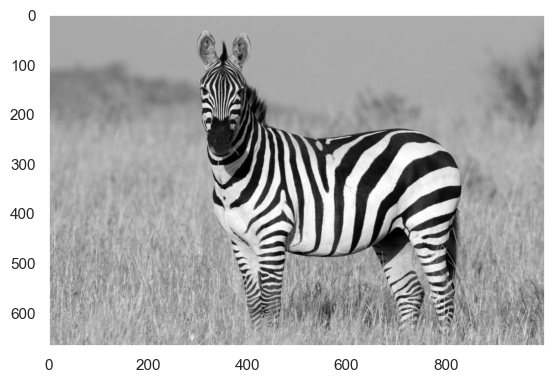

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

from skimage.feature import graycomatrix, graycoprops
from skimage import data
from skimage import io
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte


image = data.camera()
image = io.imread("img1.jpg")
image = rgb2gray(image)
image = img_as_ubyte(image)
plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')

In [20]:
import numpy as np

PATCH_SIZE = 71

# select some patches from grassy areas of the image
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_locations =np.array([
    [48,   286],
    [227,   286],
    [53,   471],
    [247,   453],
])
grass_locations = grass_locations[:, ::-1]

grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = np.array([
    [133,   39],
    [516,   88],
    [785,   53],
    [773,   119],
])
# change from y,x to x,y
sky_locations = sky_locations[:, ::-1]

sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])


In [23]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

In [17]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
# METHOD = 'uniform'
# plt.rcParams['font.size'] = 9

# def hist(ax, lbp):
#     n_bins = int(lbp.max() + 1)
#     return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
#                    facecolor='0.5')
                   
# # settings for LBP
# radius = 2
# n_points = 8 * radius


# def kullback_leibler_divergence(p, q):
#     p = np.asarray(p)
#     q = np.asarray(q)
#     filt = np.logical_and(p != 0, q != 0)
#     return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


# def match(refs, img):
#     best_score = 10
#     best_name = None
#     lbp = local_binary_pattern(img, n_points, radius, METHOD)
#     n_bins = int(lbp.max() + 1)
#     hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
#     for name, ref in refs.items():
#         ref_hist, _ = np.histogram(ref, density=True, bins=n_bins,
#                                    range=(0, n_bins))
#         score = kullback_leibler_divergence(hist, ref_hist)
#         if score < best_score:
#             best_score = score
#             best_name = name
#     return best_name


# brick = data.brick()
# grass = data.grass()
# gravel = data.gravel()

# refs = {
#     'brick': local_binary_pattern(brick, n_points, radius, METHOD),
#     'grass': local_binary_pattern(grass, n_points, radius, METHOD),
#     'gravel': local_binary_pattern(gravel, n_points, radius, METHOD)
# }

# # classify rotated textures
# print('Rotated images matched against references using LBP:')
# print('original: brick, rotated: 30deg, match result: ',
#       match(refs, rotate(brick, angle=30, resize=False)))
# print('original: brick, rotated: 70deg, match result: ',
#       match(refs, rotate(brick, angle=70, resize=False)))
# print('original: grass, rotated: 145deg, match result: ',
#       match(refs, rotate(grass, angle=145, resize=False)))

# # plot histograms of LBP of textures
# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
#                                                        figsize=(9, 6))
# plt.gray()

# ax1.imshow(brick)
# ax1.axis('off')
# hist(ax4, refs['brick'])
# ax4.set_ylabel('Percentage')

# ax2.imshow(grass)
# ax2.axis('off')
# hist(ax5, refs['grass'])
# ax5.set_xlabel('Uniform LBP values')

# ax3.imshow(gravel)
# ax3.axis('off')
# hist(ax6, refs['gravel'])

# plt.show()

In [27]:
METHOD = 'uniform'

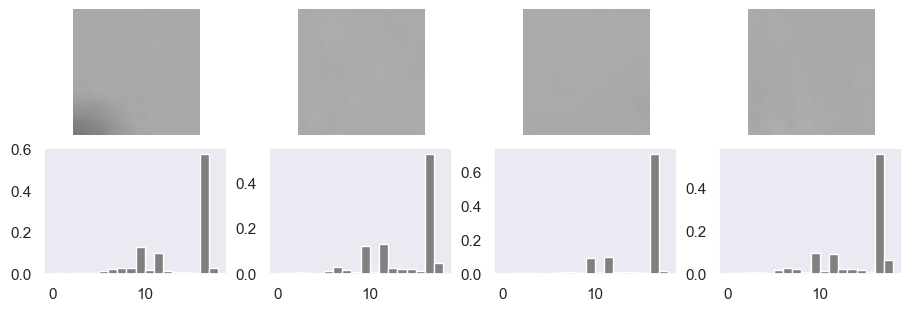

In [26]:
         
# settings for LBP
radius = 2
n_points = 8 * radius

lbp = None
lbps = []
for patch in sky_patches:
    lbp = local_binary_pattern(patch, n_points, radius, METHOD)
    lbps.append(lbp)

fig, axs = plt.subplots(2, 4, figsize=(9,3), constrained_layout=True)
for i in range(len(sky_patches)):
    axs[0][i].imshow(sky_patches[i], cmap=plt.cm.gray, interpolation='bilinear', vmin=0, vmax=255)
    axs[0][i].axis('off')

    lbp = lbps[i]
    n_bins = int(lbp.max() + 1)
    axs[1][i].hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')

In [ ]:
from skimage.feature import local_binary_pattern
def view_lbp_hist(img):
    lbp = local_binary_pattern(img, n_points, radius, METHOD)
    n_bins = int(lbp.max() + 1)
    plt.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')
    plt.show()

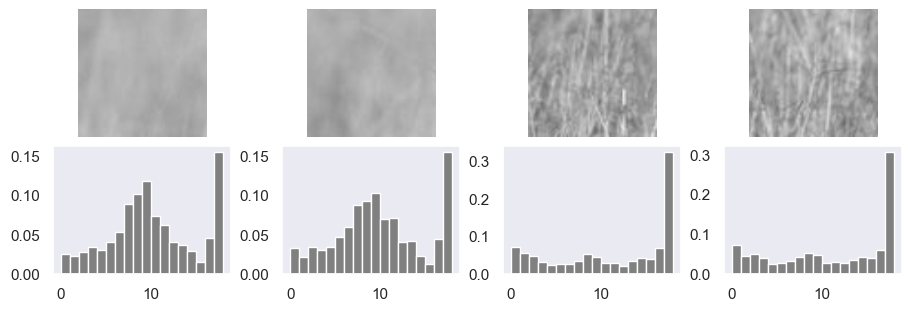

In [29]:
         
# settings for LBP
radius = 2
n_points = 8 * radius

lbp = None
lbps = []
for patch in grass_patches:
    lbp = local_binary_pattern(patch, n_points, radius, METHOD)
    lbps.append(lbp)

fig, axs = plt.subplots(2, 4, figsize=(9,3), constrained_layout=True)
for i in range(len(grass_patches)):
    axs[0][i].imshow(grass_patches[i], cmap=plt.cm.gray, interpolation='bilinear', vmin=0, vmax=255)
    axs[0][i].axis('off')

    lbp = lbps[i]
    n_bins = int(lbp.max() + 1)
    axs[1][i].hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')

In [ ]:
# compute features for each patch
X = []
for patch in (grass_patches + sky_patches):
    # LBP of the patch
    lbp = local_binary_pattern(patch, n_points, radius, method='uniform')

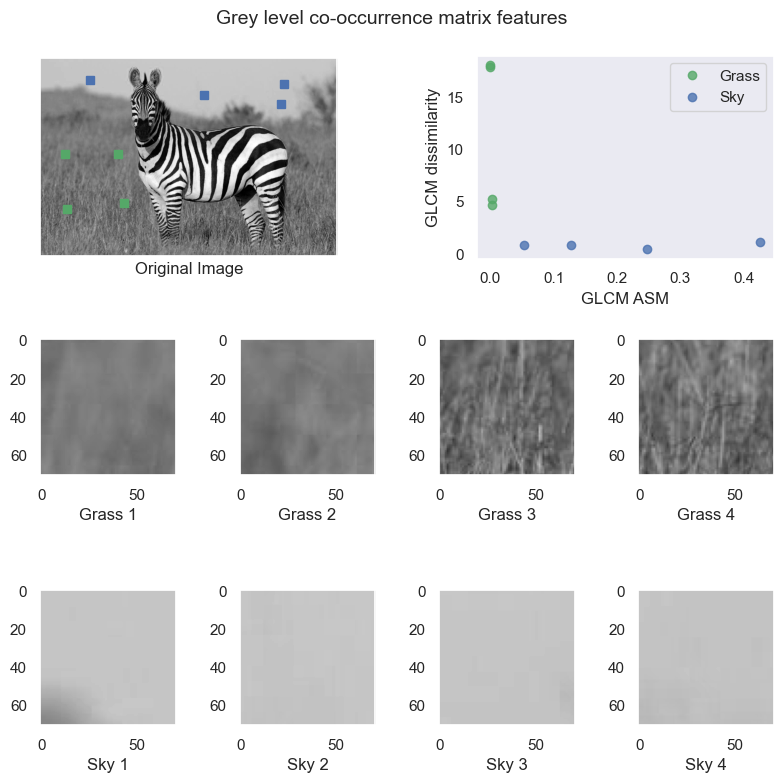

In [12]:

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass', alpha=0.8)
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky', alpha=0.8)
ax.set_xlabel('GLCM ASM')
ax.set_ylabel('GLCM dissimilarity')

ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=0.99)
plt.tight_layout()
plt.show()

[1 1 0 0 1 1 1 1]


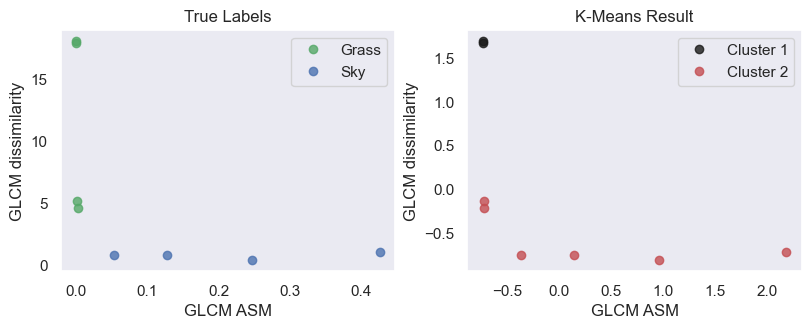

In [13]:
#cluster points using kmeans
from sklearn.cluster import KMeans
import numpy as np
X = np.array([xs, ys]).T

#standard scaler to normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)

# plot the clustered points 
fig = plt.figure(figsize=(8, 8), constrained_layout=True)

ax = fig.add_subplot(3, 2, 1)
ax.set_title("True Labels")
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass', alpha=0.8)
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky', alpha=0.8)
ax.set_xlabel('GLCM ASM')
ax.set_ylabel('GLCM dissimilarity')
ax.legend()

ax = fig.add_subplot(3, 2, 2)
ax.set_title('K-Means Result')
ax.plot(X[kmeans.labels_==0, 0], X[kmeans.labels_==0, 1], 'ko',
        label='Cluster 1', alpha=0.8)
ax.plot(X[kmeans.labels_==1, 0], X[kmeans.labels_==1, 1], 'ro',
        label='Cluster 2', alpha=0.8)    
ax.set_xlabel('GLCM ASM')
ax.set_ylabel('GLCM dissimilarity')
ax.legend()

plt.show()


In [10]:
# # importing the module
# import cv2

# # function to display the coordinates of
# # of the points clicked on the image
# def click_event(event, x, y, flags, params):

# 	# checking for left mouse clicks
# 	if event == cv2.EVENT_LBUTTONDOWN:

# 		# displaying the coordinates
# 		# on the Shell
# 		print(x, ' ', y)

# 		# displaying the coordinates
# 		# on the image window
# 		font = cv2.FONT_HERSHEY_SIMPLEX
# 		cv2.putText(img, str(x) + ',' +
# 					str(y), (x,y), font,
# 					1, (255, 0, 0), 2)
# 		cv2.imshow('image', img)

# 	# checking for right mouse clicks	
# 	if event==cv2.EVENT_RBUTTONDOWN:

# 		# displaying the coordinates
# 		# on the Shell
# 		print(x, ' ', y)

# 		# displaying the coordinates
# 		# on the image window
# 		font = cv2.FONT_HERSHEY_SIMPLEX
# 		b = img[y, x, 0]
# 		g = img[y, x, 1]
# 		r = img[y, x, 2]
# 		cv2.putText(img, str(b) + ',' +
# 					str(g) + ',' + str(r),
# 					(x,y), font, 1,
# 					(255, 255, 0), 2)
# 		cv2.imshow('image', img)

# # driver function
# if __name__=="__main__":

# 	# reading the image
# 	img = cv2.imread('data/img1.jpg', 1)

# 	# displaying the image
# 	cv2.imshow('image', img)

# 	# setting mouse handler for the image
# 	# and calling the click_event() function
# 	cv2.setMouseCallback('image', click_event)

# 	# wait for a key to be pressed to exit
# 	cv2.waitKey(0)

# 	# close the window
# 	cv2.destroyAllWindows()
